#### Methodology for portfolio construction

- Collecting data of Firms/Stocks 
- Cleaning of the available data
- Analyzing Data
- Analyzing historical responses and predicting their expected return
- Optimizing the weights of the individual to maximise returns

#### About Dataset
- Link : https://www.kaggle.com/datasets/pritish509/s-and-p-500-esg-risk-ratings
- This dataset exclusively showcases companies from the S&P 500 index. Researchers, investors, analysts, and policy-makers can utilize this dataset to gain insights into the ESG performance and risk profiles of these major corporations. Whether exploring trends, conducting ESG assessments, or making informed investment decisions, this dataset serves as a valuable resource for comprehending the sustainability and governance practices of S&P 500 companies.

In [89]:
import pandas as pd

# Load the CSV data into a DataFrame
data = pd.read_csv(r"D:\finsearch\SP 500 ESG Risk Ratings.csv")

# Drop irrelevant columns
relevant_columns = ["Symbol", "Name", "Sector", "Total ESG Risk score", "ESG Risk Percentile","ESG Risk Level"]
data = data[relevant_columns]



# Handle missing values
data.dropna(inplace=True)


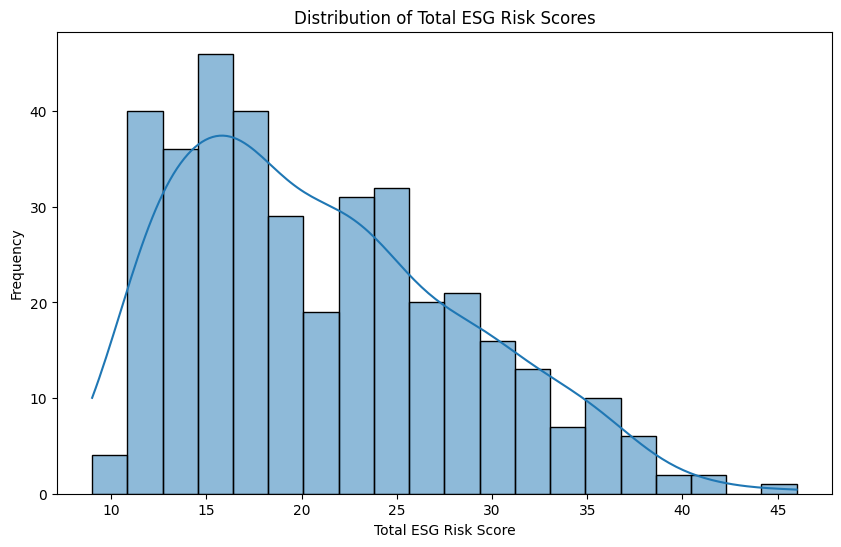

  Symbol                      Name             Sector  Total ESG Risk score  \
0      A  Agilent Technologies Inc         Healthcare                  15.0   
2    AAP    Advance Auto Parts Inc  Consumer Cyclical                  12.0   
3   AAPL                 Apple Inc         Technology                  17.0   
4   ABBV                Abbvie Inc         Healthcare                  28.0   
5    ABC    Amerisourcebergen Corp         Healthcare                  12.0   

  ESG Risk Percentile ESG Risk Level  
0     11th percentile            Low  
2      4th percentile     Negligible  
3     15th percentile            Low  
4     55th percentile         Medium  
5      5th percentile            Low  


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Printing Summary statistics
summary_stats = data.describe()

# Plooting Frequency Distribution of ESG Risk scores
plt.figure(figsize=(10, 6))
sns.histplot(data["Total ESG Risk score"], bins=20, kde=True)
plt.title("Distribution of Total ESG Risk Scores")
plt.xlabel("Total ESG Risk Score")
plt.ylabel("Frequency")
plt.show()

print(data.head())


In [29]:
df = pd.DataFrame(data)

# Mapping dictionary to map values of ESG Risk level column
risk_level_mapping = {
    'Negligible': 1,
    'Low': 2,
    'Medium': 3,
    'High': 4,
    'Severe': 5
}


df['ESG Risk Level'] = df['ESG Risk Level'].map(risk_level_mapping)

print(df)

    Symbol                      Name             Sector  Total ESG Risk score  \
0        A  Agilent Technologies Inc         Healthcare                  15.0   
2      AAP    Advance Auto Parts Inc  Consumer Cyclical                  12.0   
3     AAPL                 Apple Inc         Technology                  17.0   
4     ABBV                Abbvie Inc         Healthcare                  28.0   
5      ABC    Amerisourcebergen Corp         Healthcare                  12.0   
..     ...                       ...                ...                   ...   
495    XEL           Xcel Energy Inc          Utilities                  24.0   
496   XRAY       Dentsply Sirona Inc         Healthcare                  16.0   
497    XYL                 Xylem Inc        Industrials                  16.0   
498    YUM            Yum Brands Inc  Consumer Cyclical                  21.0   
502    ZTS                Zoetis Inc         Healthcare                  18.0   

    ESG Risk Percentile  ES

In [30]:
min=df['Total ESG Risk score'].min()
max=df['Total ESG Risk score'].max()

In [62]:
#Assuming expected returns to be proportional to ESG scorewith minimum and maximum return to be 8 and 12 respectively
df['Expected Return']=0.04*(df['Total ESG Risk score']-min)/(max-min) + 0.08

df

,Symbol,Name,Sector,Total ESG Risk score,ESG Risk Percentile,ESG Risk Level,Expected Return
0,A,Agilent Technologies Inc,Healthcare,15.0,11th percentile,2,0.086486
2,AAP,Advance Auto Parts Inc,Consumer Cyclical,12.0,4th percentile,1,0.083243
3,AAPL,Apple Inc,Technology,17.0,15th percentile,2,0.088649
4,ABBV,Abbvie Inc,Healthcare,28.0,55th percentile,3,0.100541
5,ABC,Amerisourcebergen Corp,Healthcare,12.0,5th percentile,2,0.083243
...,...,...,...,...,...,...,...
495,XEL,Xcel Energy Inc,Utilities,24.0,40th percentile,3,0.096216
496,XRAY,Dentsply Sirona Inc,Healthcare,16.0,12th percentile,1,0.087568
497,XYL,Xylem Inc,Industrials,16.0,13th percentile,1,0.087568
498,YUM,Yum Brands Inc,Consumer Cyclical,21.0,27th percentile,3,0.092973


In [65]:
#criteria for filtering
esg_risk_levels_to_keep = [1,2,3]


# Filtering the DataFrame
data = df[(df["ESG Risk Level"].isin(esg_risk_levels_to_keep)) &(df["Total ESG Risk score"] > min_total_esg_score)]

data

,Symbol,Name,Sector,Total ESG Risk score,ESG Risk Percentile,ESG Risk Level,Expected Return
4,ABBV,Abbvie Inc,Healthcare,28.0,55th percentile,3,0.100541
6,ABT,Abbott Laboratories,Healthcare,25.0,44th percentile,3,0.097297
10,ADI,Analog Devices Inc,Technology,24.0,39th percentile,3,0.096216
14,AEE,Ameren Corporation,Utilities,30.0,63rd percentile,3,0.102703
20,AJG,Arthur J Gallagher & Co,Financial Services,21.0,30th percentile,3,0.092973
...,...,...,...,...,...,...,...
477,WAB,Wabtec Corp,Industrials,23.0,38th percentile,3,0.095135
488,WMT,Walmart Inc,Consumer Defensive,25.0,43rd percentile,3,0.097297
489,WRB,Wr Berkley Corp,Financial Services,22.0,33rd percentile,3,0.094054
495,XEL,Xcel Energy Inc,Utilities,24.0,40th percentile,3,0.096216


In [86]:
from scipy.optimize import minimize
import numpy as np

returns = data["Expected Return"] 
esg_scores = data["Total ESG Risk score"]

# Define the objective function , It takes negative dot product of weights and return
def objective(weights):
    return -np.dot(weights, returns)

# Defining the constraint function
def constraint(weights):
    return np.sum(weights) - 1

# Defining equal initial weights
initial_weights = [1 / len(returns)] * len(returns)  

# Defining bounds for weights
bounds = [(0, 1)] * len(returns)

# Defining constraints dictionary
constraints = {'type': 'eq', 'fun': constraint}

# Performing optimization to minimise the negative dot product 
result = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
optimized_weights = result.x

optimized_data = pd.DataFrame({
    "Name": data["Name"],
    "Sector": data["Sector"],
    "Optimized Weight": optimized_weights})
sorted_data = optimized_data.sort_values(by="Optimized Weight", ascending=False)

print(sorted_data.head(5))



                   Name              Sector  Optimized Weight
14   Ameren Corporation           Utilities               0.2
184    Firstenergy Corp           Utilities               0.2
229   Hormel Foods Corp  Consumer Defensive               0.2
170        Entergy Corp           Utilities               0.2
178       Ford Motor Co   Consumer Cyclical               0.2


In [94]:
portfolio_data = sorted_data.copy()
total_investment = 10000000
portfolio_data["Weight"] = optimized_weights
portfolio_data["Investment"] = portfolio_data["Weight"] * total_investment

"""# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=portfolio_data, x="Sector", y="Weight")
plt.title("Portfolio Sector Allocation")
plt.xlabel("Sector")
plt.ylabel("Weight")
plt.xticks(rotation=45)
plt.show()"""

portfolio_data.sort_values(by="Investment", ascending=False)

,Name,Sector,Optimized Weight,Weight,Investment
170,Entergy Corp,Utilities,2.000000e-01,0.2,2.000000e+06
118,Costar Group Inc,Real Estate,7.927276e-18,0.2,2.000000e+06
275,Lennar Corp A,Consumer Cyclical,2.456205e-18,0.2,2.000000e+06
372,Pultegroup Inc,Consumer Cyclical,9.721885e-18,0.2,2.000000e+06
295,Mcdonald S Corp,Consumer Cyclical,9.021526e-18,0.2,2.000000e+06
...,...,...,...,...,...
103,Chipotle Mexican Grill Inc,Consumer Cyclical,9.488540e-18,0.0,0.000000e+00
340,Northern Trust Corp,Financial Services,9.789710e-18,0.0,0.000000e+00
409,Schwab (Charles) Corp,Financial Services,1.298969e-17,0.0,0.000000e+00
367,Pfizer Inc,Healthcare,1.330505e-17,0.0,0.000000e+00
